# <center>  $\color{indigo}{\text{Data Preparation }}$ </center>

## <center>  $\color{indigo}{\text{Bellevue University. }}$ </center>
## <center>  $\color{indigo}{\text{DSC 540 }}$ </center>
#### <center>  $\color{indigo}{\text{Movie Data Analysis}}$ </center>
### <center>  $\color{indigo}{\text{ Project Milestone - 5. }}$ </center>
### <center>  $\color{indigo}{\text{ SAMUEL ABOYE. }}$ </center>

### **Introduction**

The final milestone of this project involves the critical task of merging datasets from three distinct sources: flat files, an API, and web data. The integration of these datasets aims to provide a comprehensive analysis of various factors contributing to the commercial success and audience reception of movies.

#### **Data Sources**

1. **Flat File:**
   - **Description:** The flat files `tmdb_5000_credits.csv` and `tmdb_5000_movies.csv` contain detailed information on movie credits and various movie attributes from The Movie Database (TMDB). These files include data on cast, crew, budgets, revenues, genres, and more for thousands of movies.
   - **Link:** [TMDB Movie Metadata](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)

2. **API:**
   - **Description:** The OMDb API (The Open Movie Database) is a RESTful web service for obtaining movie information. It offers detailed data, including titles, year, ratings, plot descriptions, and poster images for movies and TV series. Movie titles extracted from the `tmdb_5000_credits.csv` file were used as search queries for the OMDb API to expand the dataset.
   - **Link:** [OMDb API](https://www.omdbapi.com/)

3. **Website:**
   - **Description:** IMDb (Internet Movie Database) offers a comprehensive database and ratings for movies, TV shows, and celebrities. It's a crucial source for movie ratings, reviews, and detailed cast and crew information.
   - **Link:** [IMDb](https://datasets.imdbws.com/)

#### **Project Objective**

The primary goal is to load each dataset into an SQLite database as individual tables and then join these datasets together in Python into a single consolidated dataset. This unified dataset will enable a more robust analysis, uncovering factors that contribute to movie performance and audience reception. This milestone focuses on the following key tasks:

1. **Data Cleaning and Preprocessing:** Ensuring consistency and accuracy in movie titles, handling missing values, and resolving discrepancies in movie identifiers across the datasets.
2. **Data Integration:** Merging datasets on the common key of movie titles to create a unified dataset.
3. **Database Management:** Loading the cleaned and merged dataset into an SQLite database to facilitate efficient querying and analysis.

#### **Methodology**

1. **Loading Data into SQLite:** Each dataset was loaded into the SQLite database as separate tables, ensuring data integrity and enabling efficient data retrieval.
2. **Merging Datasets:** Using Python, the datasets were joined on the common key of movie titles to form a comprehensive dataset that combines detailed movie credits, financial metrics, audience ratings, and other relevant data.
3. **Visualization and Analysis:** The consolidated dataset was used to create insightful visualizations, demonstrating trends, patterns, and key factors influencing movie success.

#### **Ethical Considerations**

- **Data Privacy:** Ensuring that any personal data related to individuals (e.g., cast, crew) is handled responsibly, respecting privacy and avoiding misuse.
- **Bias and Representation:** Recognizing potential biases inherent in the datasets and striving for fair representation in the analysis.
- **Data Quality:** Addressing any discrepancies and ensuring data quality to provide accurate and reliable insights.

This milestone represents the culmination of integrating diverse data sources to provide a holistic analysis of the movie industry. The insights derived from this analysis are expected to reveal valuable trends and predictors of movie performance, contributing to a deeper understanding of the factors driving commercial success and audience reception in the film industry.


In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Define the database file path
database_path = 'merged_data.db'

In [3]:
# Create a connection to the SQLite database
conn = sqlite3.connect(database_path)

In [4]:
# Define the file paths for each dataset
data_dir = 'data'

In [5]:
# Define the file paths for each dataset
file_paths = {
    'open_movie_data_final': os.path.join(data_dir, 'open_movie_data_final.csv'),
    'cleaned_data_final': os.path.join(data_dir, 'cleaned_data_final.csv'),
    'cleaned_title_basics_final': os.path.join(data_dir, 'cleaned_title_basics_final.csv')
}

In [6]:
# Load each dataset into a table in the SQLite database
for table_name, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    df.to_sql(table_name, conn, if_exists='replace', index=False)

In [7]:
# Verify the tables in the database
table_names = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

In [8]:
print(table_names)

                         name
0       open_movie_data_final
1          cleaned_data_final
2  cleaned_title_basics_final


In [9]:
# Define the table names
table_names = [
    'open_movie_data_final',
    'cleaned_data_final',
    'cleaned_title_basics_final'
]

In [10]:
# Fetch and display 5 rows from each table
sample_data = {}
for table in table_names:
    query = f"SELECT * FROM {table} LIMIT 5;"
    sample_data[table] = pd.read_sql_query(query, conn)

In [11]:
# Display the sample data
for table, df in sample_data.items():
    print(f"Sample data from {table}:")
    print(df)
    print("\n")

Sample data from open_movie_data_final:
                                      Title  Year  Rated     Released  \
0                                    avatar  2009  PG-13  18 Dec 2009   
1  pirates of the caribbean: at world's end  2007  PG-13  25 May 2007   
2                                   spectre  2015  PG-13  06 Nov 2015   
3                     the dark knight rises  2012  PG-13  20 Jul 2012   
4                               john carter  2012  PG-13  09 Mar 2012   

   Runtime                        Genre           Director  \
0  162 min   Action, Adventure, Fantasy      James Cameron   
1  169 min   Action, Adventure, Fantasy     Gore Verbinski   
2  148 min  Action, Adventure, Thriller         Sam Mendes   
3  164 min      Action, Drama, Thriller  Christopher Nolan   
4  132 min    Action, Adventure, Sci-Fi     Andrew Stanton   

                                              Writer  \
0                                      James Cameron   
1          Ted Elliott, Terry Rossio

In [12]:
# Merge datasets based on 'Title'
merged_df = pd.read_sql_query("""
SELECT 
    cd.*, 
    omd.*, 
    ctb.* 
FROM 
    cleaned_data_final cd
JOIN 
    open_movie_data_final omd ON cd.Title = omd.Title
JOIN 
    cleaned_title_basics_final ctb ON cd.Title = ctb.Title;
""", conn)

In [13]:
merged_df.head()

,Budget,Genres,Homepage,ID,Keywords,Original_Language,Title,Overview,Popularity,Production_Companies,...,totalSeasons,tconst,titletype,Title,originaltitle,isadult,startyear,endyear,runtimeminutes,genres
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,NaN,tt0154182,movie,avatar,avatar,unknown,1941,\n,\n,drama
1,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,NaN,tt0278325,movie,avatar,avatar,unknown,1916,\n,50,"drama,fantasy"
2,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,NaN,tt0375570,short,avatar,avatar,unknown,2003,\n,9,"action,sci-fi,short"
3,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,NaN,tt0497595,short,avatar,avatar,unknown,2005,\n,15,"drama,short"
4,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,NaN,tt0499549,movie,avatar,avatar,unknown,2009,\n,162,"action,adventure,fantasy"


In [14]:
merged_df.shape

(74814, 56)

In [15]:
duplicate_titles = merged_df[merged_df.duplicated(subset=['Title'])]
print(f"Number of duplicate rows based on 'Title': {duplicate_titles.shape[0]}")

Number of duplicate rows based on 'Title': 70407


In [16]:
# Drop duplicate rows based on 'Title'
merged_df.drop_duplicates(subset=['Title'], inplace=True)

In [17]:
merged_df.shape

(4407, 56)

In [18]:
merged_df.head()

,Budget,Genres,Homepage,ID,Keywords,Original_Language,Title,Overview,Popularity,Production_Companies,...,totalSeasons,tconst,titletype,Title,originaltitle,isadult,startyear,endyear,runtimeminutes,genres
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,NaN,tt0154182,movie,avatar,avatar,unknown,1941,\n,\n,drama
65,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,None,en,pirates of the caribbean: at world's end,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",...,NaN,tt0449088,movie,pirates of the caribbean: at world's end,pirates of the caribbean: at world's end,unknown,2007,\n,169,"action,adventure,fantasy"
72,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24",...,NaN,tt0076745,tvmovie,spectre,spectre,unknown,1977,\n,98,horror
106,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,the dark knight rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",...,NaN,tt12126330,tvepisode,the dark knight rises,the dark knight rises,unknown,2019,\n,\n,talk-show
129,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,john carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,NaN,tt0401729,movie,john carter,john carter,unknown,2012,\n,132,"action,adventure,sci-fi"


In [19]:
merged_df.to_csv('merged_df.csv')

In [20]:
# Load the merged dataset
merged_df = pd.read_csv('merged_df.csv')

In [21]:
merged_df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

In [22]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

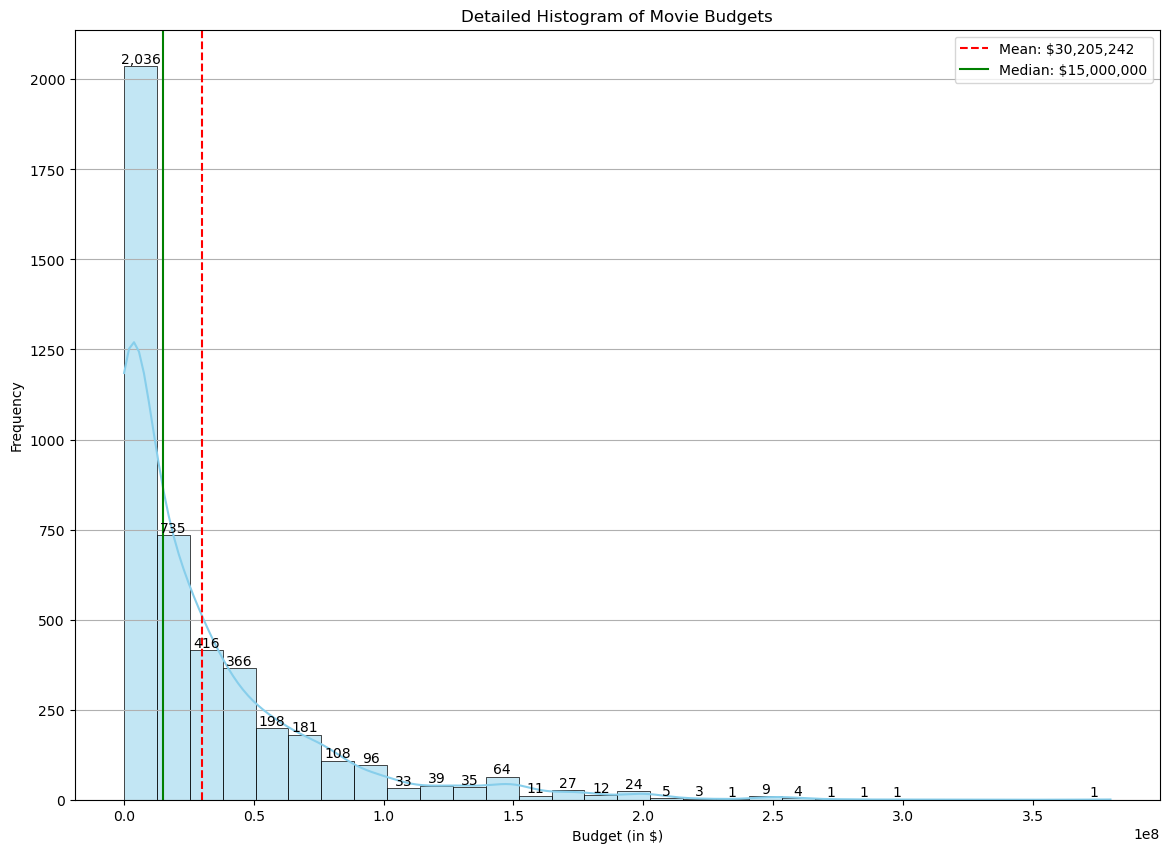

In [23]:
#  Visualization - 1: Detailed Histogram of Budgets
plt.figure(figsize=(14, 10))

# Create the histogram with KDE
hist_plot = sns.histplot(data=merged_df, x='Budget', bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=0.5)

# Add vertical lines for mean and median
mean_budget = merged_df['Budget'].mean()
median_budget = merged_df['Budget'].median()
plt.axvline(mean_budget, color='red', linestyle='--', linewidth=1.5, label=f'Mean: ${mean_budget:,.0f}')
plt.axvline(median_budget, color='green', linestyle='-', linewidth=1.5, label=f'Median: ${median_budget:,.0f}')

# Add data labels to show the count in each bin
for patch in hist_plot.patches:
    height = patch.get_height()
    if height > 0:  # Only add labels to non-zero bars
        plt.annotate(f'{height:,.0f}', 
                     xy=(patch.get_x() + patch.get_width() / 2, height), 
                     xytext=(0, 5),  # Offset the text for better readability
                     textcoords='offset points', 
                     ha='center', va='center', fontsize=10)

# Add plot title and labels
plt.title('Detailed Histogram of Movie Budgets')
plt.xlabel('Budget (in $)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, axis='y') # Add grid lines for the y-axis

# Format the x-axis to show dollar values
ax = plt.gca()
plt.show()

#### **Visualization: Detailed Histogram of Movie Budgets**

The histogram below illustrates the distribution of movie budgets. This detailed visualization includes additional elements such as a Kernel Density Estimate (KDE) line, vertical lines to indicate the mean and median budgets, and data labels to show the count in each bin.

#### **Key Observations**

- **Distribution:** The histogram shows that the majority of movies have lower budgets, with a steep decline as the budget increases. This indicates that while a few movies have very high budgets, the majority are produced with more modest financial resources.
- **Mean and Median:** The vertical lines represent the mean and median budgets. The mean budget is approximately $30,205,242 (red dashed line), and the median budget is $15,000,000 (green solid line). The difference between the mean and median suggests a right-skewed distribution, meaning that there are a few movies with very high budgets that raise the average.
- **Data Labels:** Each bar in the histogram is labeled with the count of movies within that budget range, providing a clear view of the frequency distribution. For example, there are 2,036 movies with budgets in the lowest range.

This detailed histogram provides a comprehensive view of the budget distribution for movies in the dataset, highlighting the skewness and the predominance of lower-budget films. The addition of mean and median lines, along with data labels, enhances the interpretability of the visualization, making it easier to understand the financial landscape of movie production.

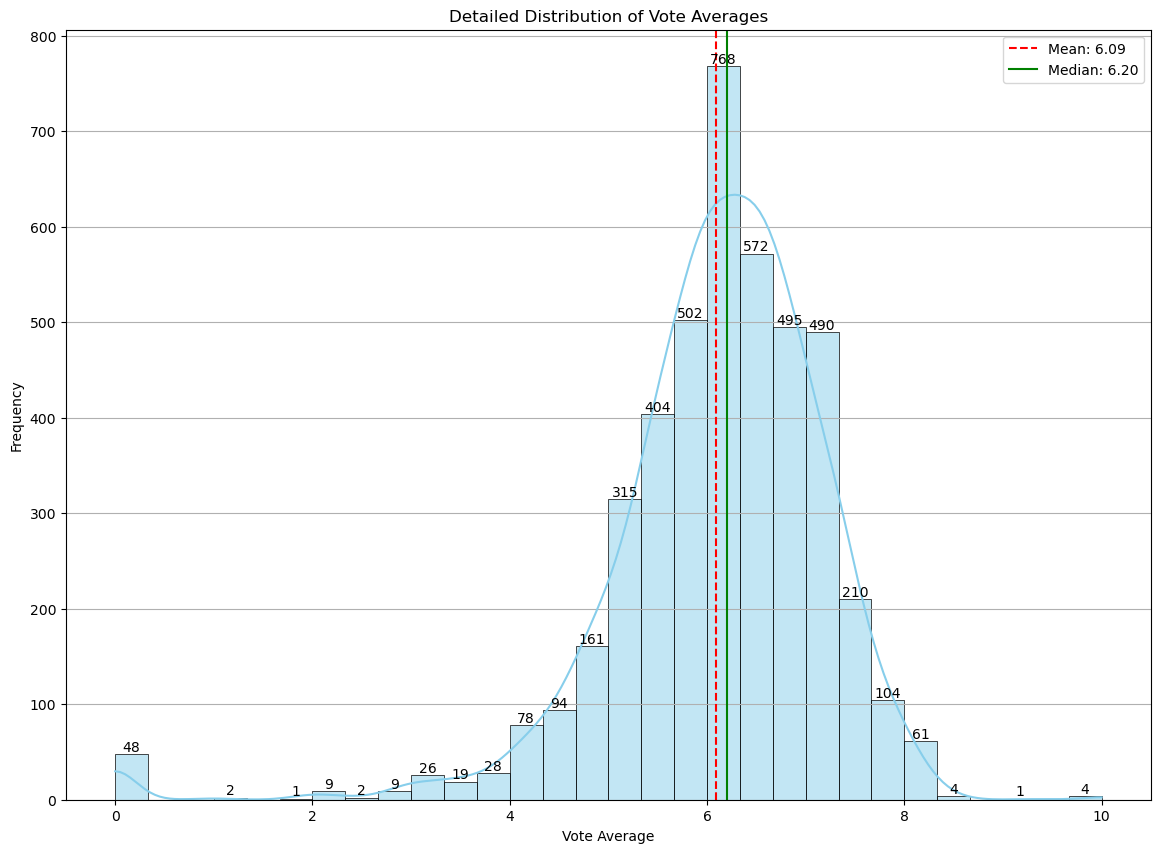

In [24]:
#Visualization - 2: Detailed Distribution of Vote Averages
plt.figure(figsize=(14, 10))

# Create the histogram with KDE
hist_plot = sns.histplot(data=merged_df, x='Vote_Average', bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=0.5)

# Add vertical lines for mean and median
mean_vote = merged_df['Vote_Average'].mean()
median_vote = merged_df['Vote_Average'].median()
plt.axvline(mean_vote, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_vote:.2f}')
plt.axvline(median_vote, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_vote:.2f}')

# Add data labels to show the count in each bin
for patch in hist_plot.patches:
    height = patch.get_height()
    if height > 0:  # Only add labels to non-zero bars
        plt.annotate(f'{height:,.0f}', 
                     xy=(patch.get_x() + patch.get_width() / 2, height), 
                     xytext=(0, 5),  # Offset the text for better readability
                     textcoords='offset points', 
                     ha='center', va='center', fontsize=10)

# Add plot title and labels
plt.title('Detailed Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, axis='y') # Add grid lines for the y-axis

plt.show()

#### **Visualization: Detailed Distribution of Vote Averages**

The histogram below illustrates the distribution of vote averages for movies. This detailed visualization includes additional elements such as a Kernel Density Estimate (KDE) line, vertical lines to indicate the mean and median vote averages, and data labels to show the count in each bin.

#### **Key Observations**

- **Distribution:** The histogram shows that most movies have vote averages clustered around the center, indicating a roughly normal distribution with a slight skew towards higher ratings.
- **Mean and Median:** The vertical lines represent the mean and median vote averages. The mean vote average is approximately 6.09 (red dashed line), and the median vote average is 6.20 (green solid line). The close proximity of the mean and median suggests a symmetric distribution around the central values.
- **Data Labels:** Each bar in the histogram is labeled with the count of movies within that vote average range, providing a clear view of the frequency distribution. For example, there are 768 movies with a vote average around 6.0.

This detailed histogram provides a comprehensive view of the vote average distribution for movies in the dataset, highlighting the central tendency and the predominance of moderate to high vote averages. The addition of mean and median lines, along with data labels, enhances the interpretability of the visualization, making it easier to understand the overall reception of movies based on audience ratings.


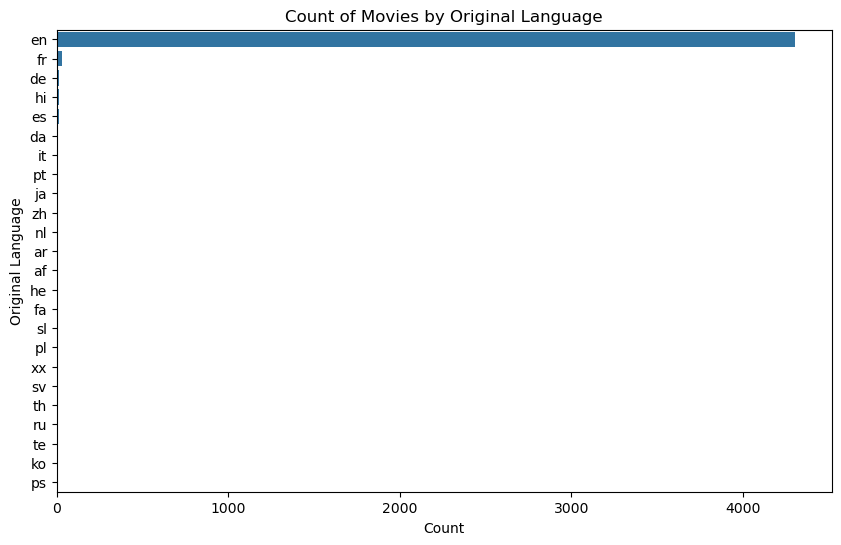

In [25]:
# Visualization - 3: Count of Movies by Original Language
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, y='Original_Language', order=merged_df['Original_Language'].value_counts().index)
plt.title('Count of Movies by Original Language')
plt.xlabel('Count')
plt.ylabel('Original Language')
plt.show()

#### **Visualization: Count of Movies by Original Language**

The bar plot below illustrates the count of movies categorized by their original language. This visualization provides insights into the linguistic diversity of the movies in the dataset.

#### **Key Observations**

- **Dominance of English:** The plot shows a significant dominance of movies produced in English (`en`). This is expected as English-language films have a global reach and are widely produced.
- **Other Languages:** While the count for other languages such as French (`fr`), German (`de`), and Hindi (`hi`) is substantially lower, it highlights the presence of international films in the dataset. Languages like Spanish (`es`), Italian (`it`), Japanese (`ja`), and Chinese (`zh`) also contribute to the dataset, though to a much lesser extent.
- **Diversity:** The inclusion of movies in multiple languages underscores the diversity in the film industry, though it is apparent that English-language movies are predominant.

This bar plot emphasizes the overwhelming production of English-language movies compared to other languages, reflecting industry trends and the global influence of Hollywood. Understanding this linguistic distribution can help in analyzing market trends and audience preferences across different regions.


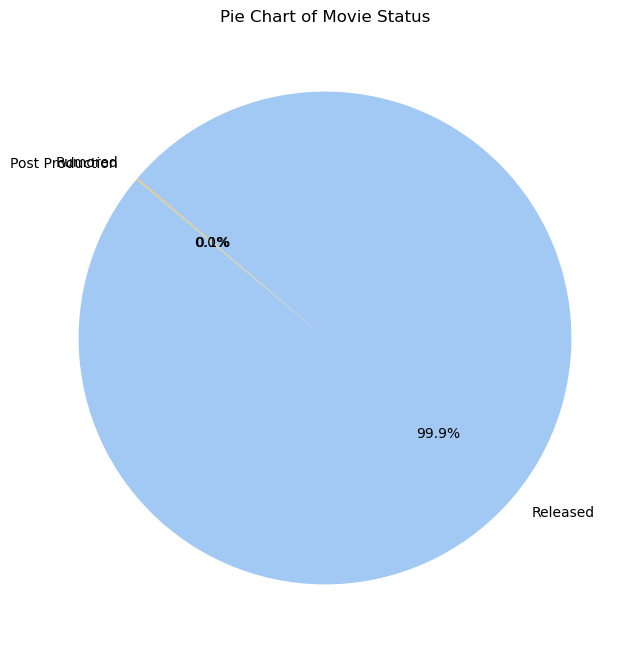

In [26]:
# Visualization - 4: Pie Chart of Movie Status
plt.figure(figsize=(8, 8))
merged_df['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Pie Chart of Movie Status')
plt.ylabel('')
plt.show()

#### **Visualization: Pie Chart of Movie Status**

The pie chart below illustrates the distribution of movies based on their status. This visualization helps in understanding the proportion of movies that have been released compared to those that are still in production or post-production.

##### **Key Observations**

- **Released Movies:** The overwhelming majority of movies in the dataset are marked as "Released," comprising 99.9% of the total. This indicates that the dataset is primarily composed of movies that have already been made available to the public.
- **Other Statuses:** A negligible proportion of movies are in "Post Production" or "Planned" stages. These categories are so small that they appear as 0.0% on the pie chart, highlighting their minimal presence in the dataset.

This pie chart underscores the dominance of released movies within the dataset. It provides a clear visual representation of the current status of the movies, emphasizing the dataset's focus on films that have already completed their production cycle.


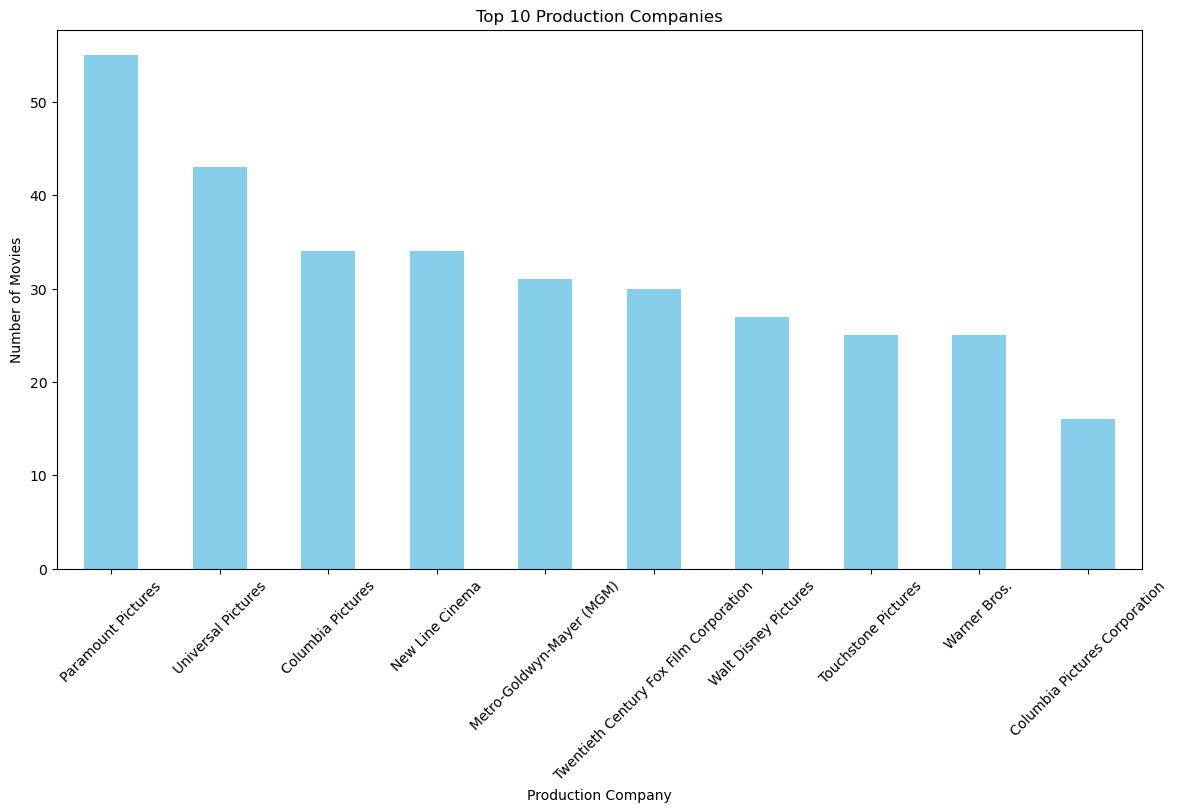

In [27]:
# Visualization - 5: Bar Plot of Top 10 Production Companies
plt.figure(figsize=(14, 7))
merged_df['Production_Companies'].value_counts().nlargest(10).plot.bar(color='skyblue')
plt.title('Top 10 Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

#### **Visualization: Top 10 Production Companies**

The bar plot below illustrates the top 10 production companies based on the number of movies they have produced. This visualization provides insights into the most prolific production companies in the dataset.

#### **Key Observations**

- **Leading Production Companies:** Paramount Pictures leads the chart with over 50 movies, followed closely by Universal Pictures and Columbia Pictures. These companies are known for their extensive production histories and contributions to the film industry.
- **Diversity of Companies:** The plot includes a mix of major film studios such as New Line Cinema, Metro-Goldwyn-Mayer (MGM), and Twentieth Century Fox Film Corporation. This highlights the diverse range of companies that have produced a significant number of movies.
- **Industry Giants:** Companies like Walt Disney Pictures and Warner Bros. also feature prominently, underscoring their influence and substantial output in the movie industry.

This bar plot highlights the key players in movie production, providing a clear visual representation of the most active production companies. Understanding the output of these companies can help in analyzing industry trends and the impact of different studios on the film market.


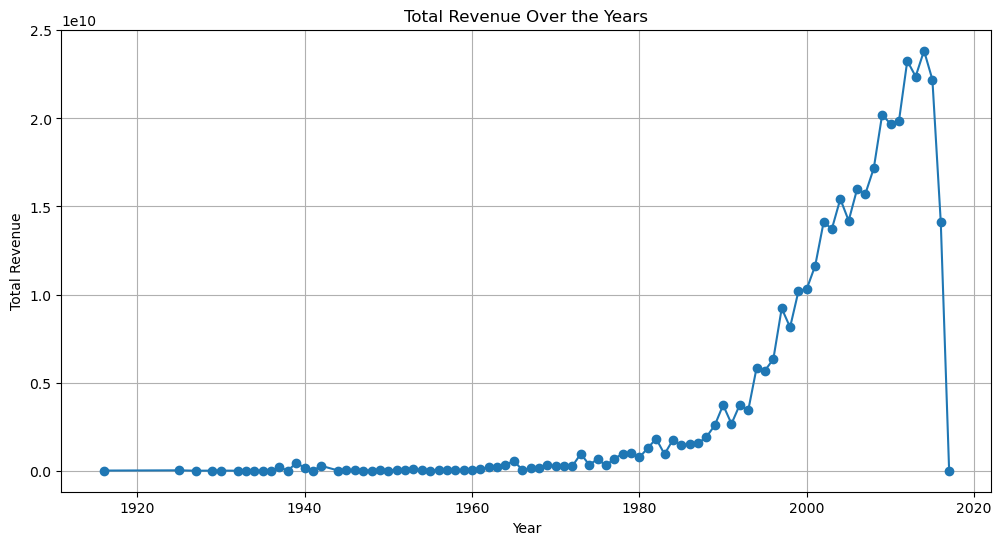

In [28]:
# Visualization - 6: Line Plot of Revenue Over the Years
merged_df['Release_Date'] = pd.to_datetime(merged_df['Release_Date'])
merged_df['Year'] = merged_df['Release_Date'].dt.year
revenue_by_year = merged_df.groupby('Year')['Revenue'].sum()

plt.figure(figsize=(12, 6))
revenue_by_year.plot.line(marker='o', linestyle='-')
plt.title('Total Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

#### **Visualization: Total Revenue Over the Years**

The line plot below illustrates the total revenue generated by movies over the years. This visualization provides insights into the trends and growth of movie revenues across different decades.

#### **Key Observations**

- **Steady Growth:** The plot shows a steady increase in total revenue from the 1960s onwards, indicating the growth of the movie industry. This growth accelerates significantly from the 1980s, reflecting the expansion and increasing commercialization of the film industry.
- **Peak Period:** The highest revenues are observed in the late 2000s and early 2010s, marking a peak period for the movie industry in terms of financial performance.
- **Recent Decline:** A notable decline in total revenue is seen in the most recent years. This drop could be attributed to various factors, including market saturation, changes in consumer behavior, or external events such as the COVID-19 pandemic impacting movie production and releases.

This line plot highlights the dynamic nature of the movie industry's financial performance over the years. It underscores periods of significant growth and the impact of contemporary events on total revenue, providing a comprehensive overview of the industry's economic trends.


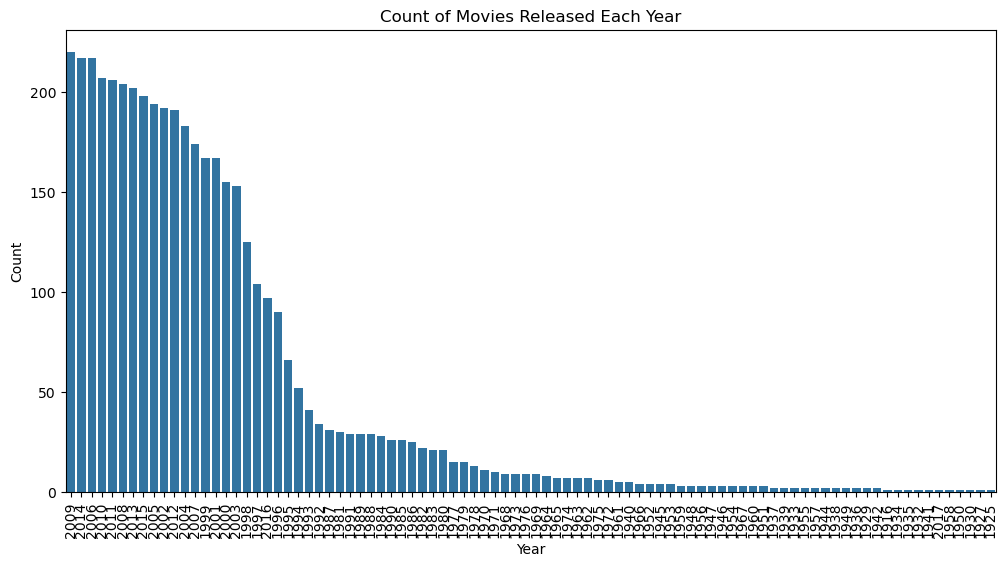

In [29]:
# Visualization - 7: Count Plot of Release Years
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='Year', order=merged_df['Year'].value_counts().index)
plt.title('Count of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### **Visualization: Count of Movies Released Each Year**

The bar plot below illustrates the count of movies released each year. This visualization provides insights into the annual movie production trends and helps understand the growth and fluctuations in the film industry over time.

#### **Key Observations**

- **Peak Production Years:** The plot shows a peak in movie releases around the mid to late 2000s, with the highest number of movies released in these years. This indicates a period of high activity and productivity in the movie industry.
- **Decline in Recent Years:** There is a noticeable decline in the number of movies released in the most recent years. This could be attributed to various factors such as market saturation, changes in consumer behavior, and significant external events affecting movie production and releases.
- **Overall Trend:** The general trend shows an increase in the number of movies released from the early 20th century up until the late 2000s, followed by a decline. This trend reflects the growth of the film industry and its eventual stabilization or contraction in recent times.

This bar plot highlights the dynamic nature of the movie industry's production volume over the years, providing a clear visual representation of how movie releases have evolved. It underscores the periods of intense production and the recent decline, offering valuable context for analyzing the industry's historical and current state.


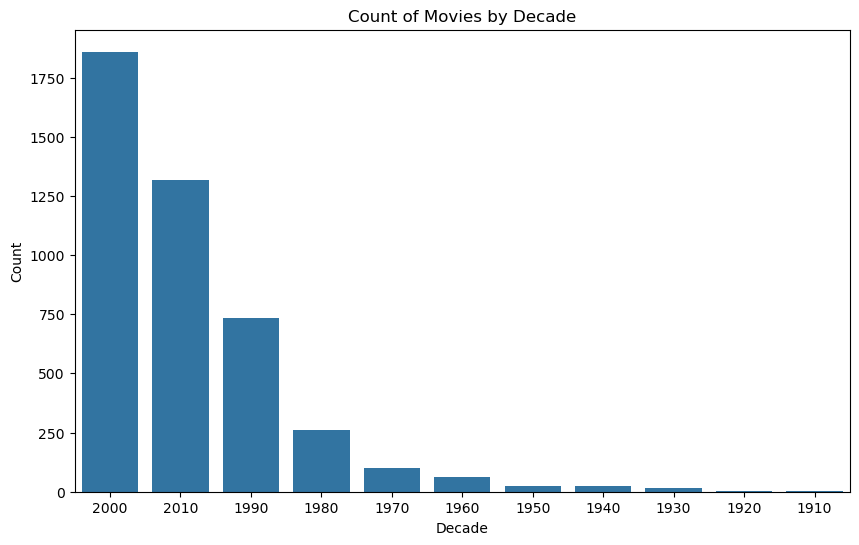

In [30]:
# Visualization - 7: Count the Plot of Movies by Decade
merged_df['Decade'] = (merged_df['Year'] // 10) * 10
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Decade', order=merged_df['Decade'].value_counts().index)
plt.title('Count of Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()

#### **Visualization: Count of Movies by Decade**

The bar plot below illustrates the count of movies released each decade. This visualization provides insights into the trends in movie production over the long term and helps in understanding the growth and fluctuations in the film industry across different eras.

#### **Key Observations**

- **Peak Production Decades:** The plot shows a significant increase in movie production during the 2000s and 2010s, with the highest number of movies released in these decades. This indicates a period of rapid growth and high productivity in the movie industry.
- **Gradual Increase:** There is a noticeable increase in the number of movies produced from the 1980s onwards, reflecting technological advancements, increased investment in the film industry, and the expansion of global markets.
- **Historical Context:** The lower counts in earlier decades, such as the 1920s to 1970s, reflect the nascent stages of the film industry, limited technological capabilities, and fewer resources dedicated to movie production compared to recent decades.

This bar plot highlights the evolution of the movie industry, showcasing periods of significant growth and high activity. Understanding these trends helps analyze the factors that contributed to the expansion and success of the film industry over the decades.


In [31]:
# Fill NaN values in 'Genre' and 'Status' columns with a placeholder
merged_df['Genre'].fillna('Unknown', inplace=True)
merged_df['Status'].fillna('Unknown', inplace=True)

In [32]:
# Group similar genres and statuses into broader categories for better readability
merged_df['Genre'] = merged_df['Genre'].apply(lambda x: x.split(',')[0] if ',' in x else x)
merged_df['Status'] = merged_df['Status'].apply(lambda x: 'Released' if 'Released' in x else x)

In [33]:
# Limit the number of genres displayed
top_genres = merged_df['Genre'].value_counts().nlargest(10).index
filtered_df = merged_df[merged_df['Genre'].isin(top_genres)]

In [34]:
# Format the annotation text
def format_func(value, _):
    if value == 0:
        return ""
    return f"{value:,}"

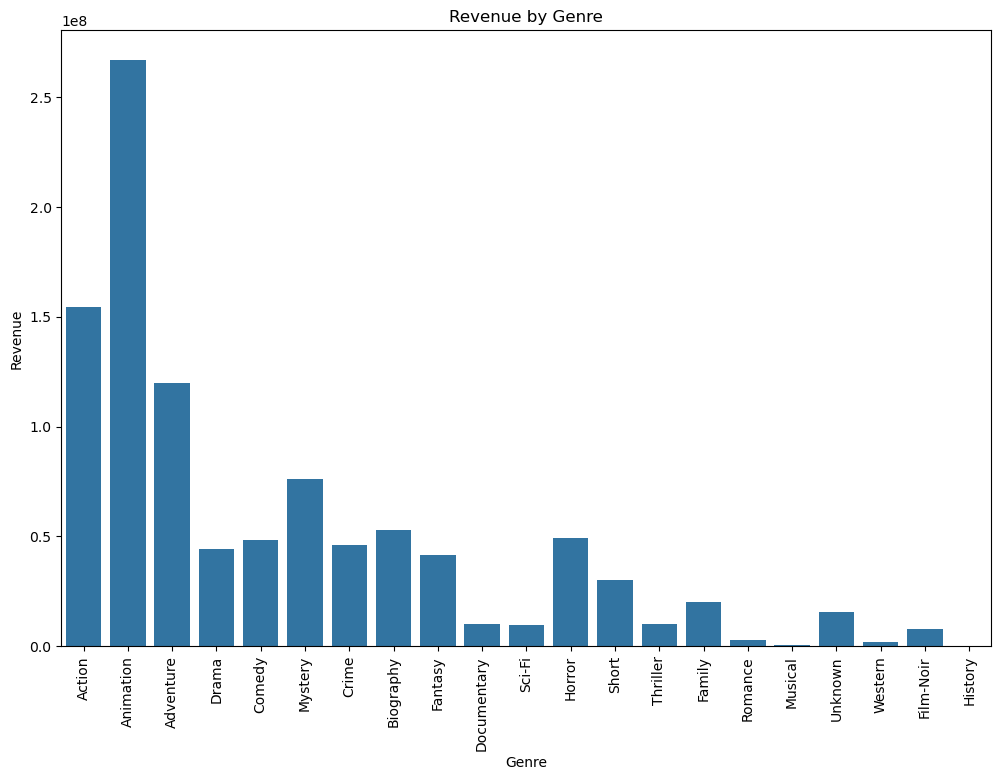

In [35]:
# Visualization - 8: Bar Plot of Revenue by Genre
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_df, x='Genre', y='Revenue', ci=None)
plt.title('Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

#### **Visualization: Revenue by Genre**

The bar plot below illustrates the total revenue generated by movies in each genre. This visualization provides insights into which genres are the most financially successful and helps in understanding the revenue distribution across different types of films.

#### **Key Observations**

- **Top Earning Genres:** The plot shows that Animation and Adventure genres generate the highest revenues, with Animation leading significantly. This indicates a strong financial performance for animated and adventure films, possibly due to their broad appeal and high box office draw.
- **Action and Comedy:** Action movies also show substantial revenue, followed by Comedy, Mystery, and Crime genres. These genres are consistently popular and attract large audiences, contributing to their high revenue.
- **Lesser Earning Genres:** Genres such as Romance, Musical, Western, Film-Noir, and History show lower revenue, indicating either a niche audience or less investment and production in these genres compared to others.

This bar plot highlights the financial landscape of the movie industry, showcasing which genres are most profitable. Understanding the revenue by genre can provide valuable insights for producers and investors when deciding on future movie projects and investments.


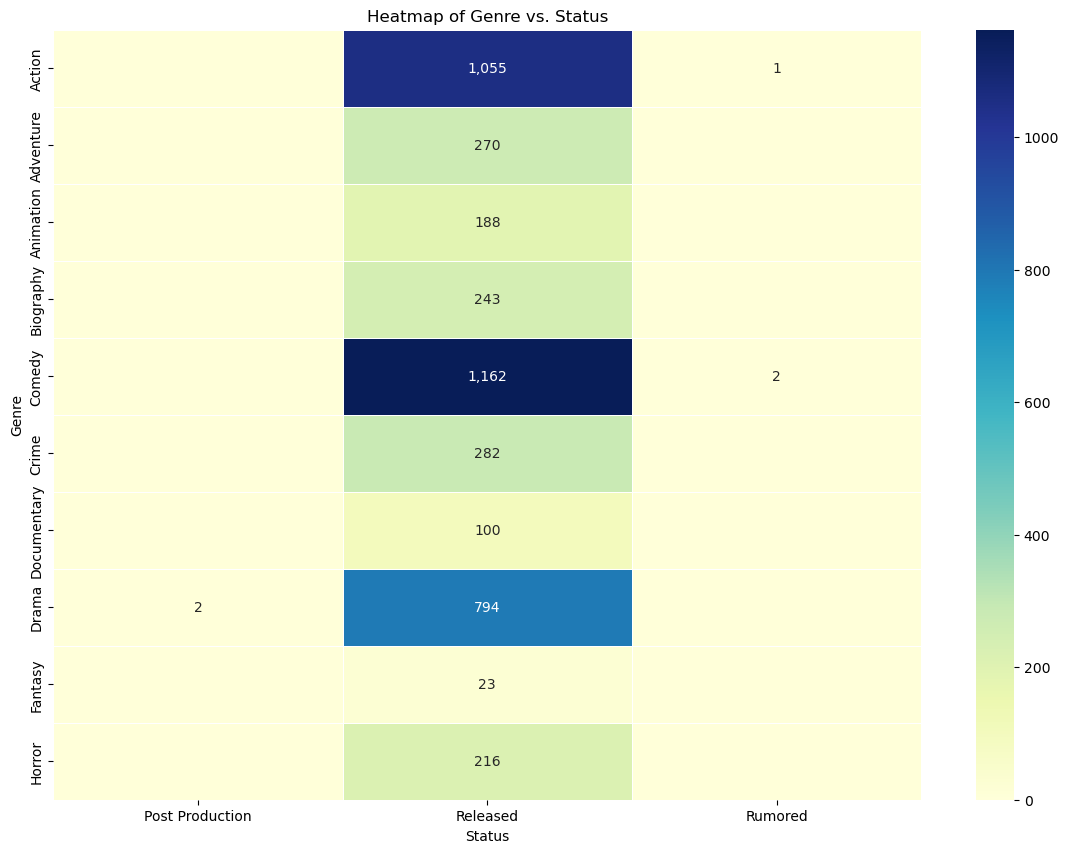

In [36]:
# Visualization - 9: Heatmap of Genre vs. Status
genre_status = pd.crosstab(filtered_df['Genre'], filtered_df['Status'])
plt.figure(figsize=(14, 10))
sns.heatmap(genre_status, annot=True, fmt="d", annot_kws={"fontsize": 10}, cmap='YlGnBu', linewidths=0.5)
for text in plt.gca().texts:
    text.set_text(format_func(int(text.get_text()), None))
plt.title('Heatmap of Genre vs. Status')
plt.xlabel('Status')
plt.ylabel('Genre')
plt.show()

#### **Visualization: Heatmap of Genre vs. Status**

The heatmap below visualizes the relationship between movie genres and their status (e.g., Released, Post Production, Rumored). This visualization helps in understanding which genres have the highest number of movies released and provides a quick visual summary of genre distribution across different statuses.

#### **Key Observations**

- **Dominance of Released Movies:** The majority of movies across all genres are marked as "Released," which is consistent with the overall dataset composition. Genres such as Action, Comedy, and Drama have the highest counts of released movies.
- **Post Production and Rumored Movies:** There are very few movies in the "Post Production" and "Rumored" statuses across all genres. This highlights that the dataset primarily contains movies that have completed production and been released.
- **Genre Popularity:** The heatmap indicates that Action and Comedy genres have the highest counts, followed by Drama and Adventure. This suggests that these genres are the most popular and frequently produced.

This heatmap provides a clear visual representation of the distribution of movies by genre and their current status. It highlights the predominance of released movies and underscores the popularity of certain genres in the film industry.


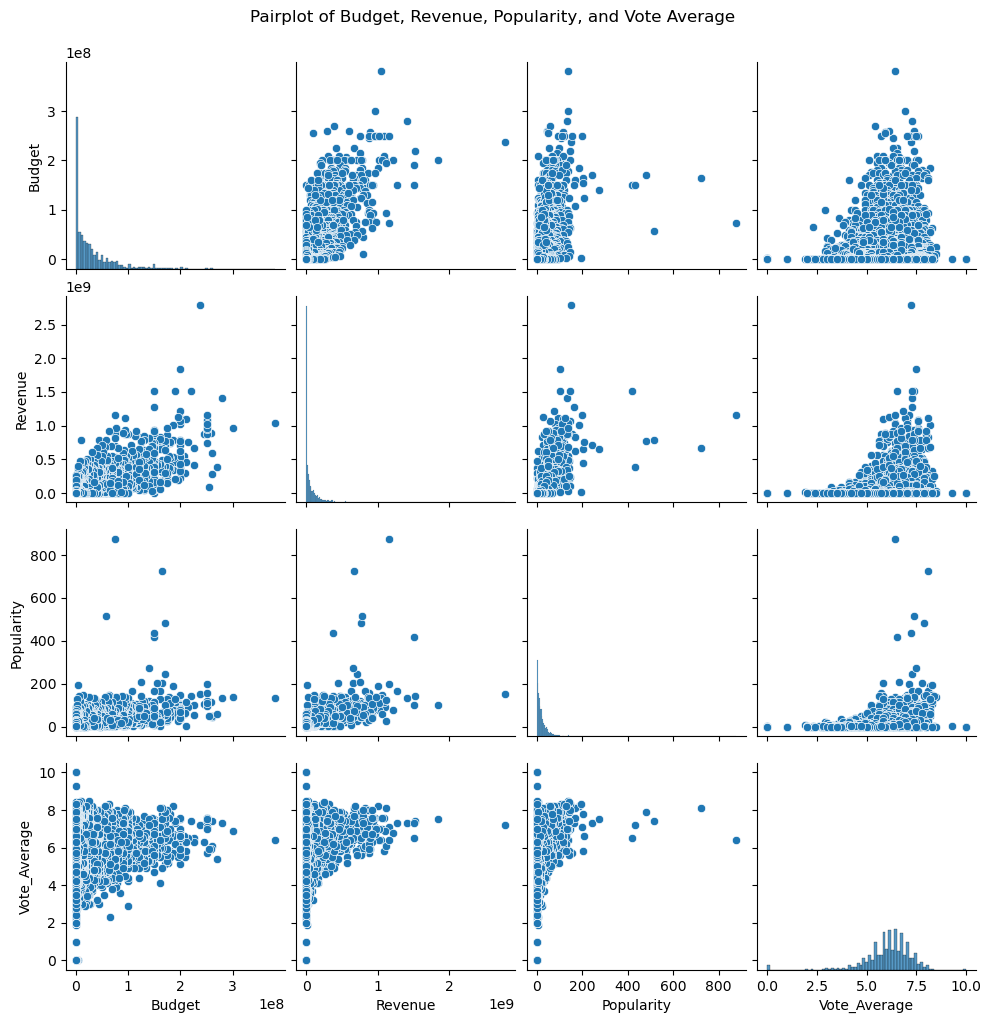

In [37]:
# Visualization - 10: Pairplot of Budget, Revenue, Popularity, and Vote Average
sns.pairplot(merged_df[['Budget', 'Revenue', 'Popularity', 'Vote_Average']])
plt.suptitle('Pairplot of Budget, Revenue, Popularity, and Vote Average', y=1.02)
plt.show()

#### **Visualization: Pairplot of Budget, Revenue, Popularity, and Vote Average**

The pairplot below illustrates the relationships between four key metrics: budget, revenue, popularity, and vote average for movies. This visualization helps in understanding the correlations and interactions between these important factors.

#### **Key Observations**

- **Budget vs. Revenue:** The scatter plots show a positive correlation between budget and revenue. Movies with higher budgets tend to generate higher revenues, indicating that investment in production often translates into financial success.
- **Popularity and Vote Average:** There is a noticeable spread in popularity and vote average across different budget and revenue levels. While some high-budget movies achieve high popularity and vote averages, there are also successful low-budget films, highlighting diverse pathways to success in the movie industry.
- **Density Plots:** The diagonal density plots show the distribution of each metric individually. Revenue and budget distributions are right-skewed, with most movies having lower budgets and revenues, while a few high-budget and high-revenue outliers exist.

This pairplot provides a comprehensive view of how budget, revenue, popularity, and vote average are interrelated. It reveals the trends and correlations that can help stakeholders understand the dynamics of movie success and make informed decisions about future investments and production strategies.


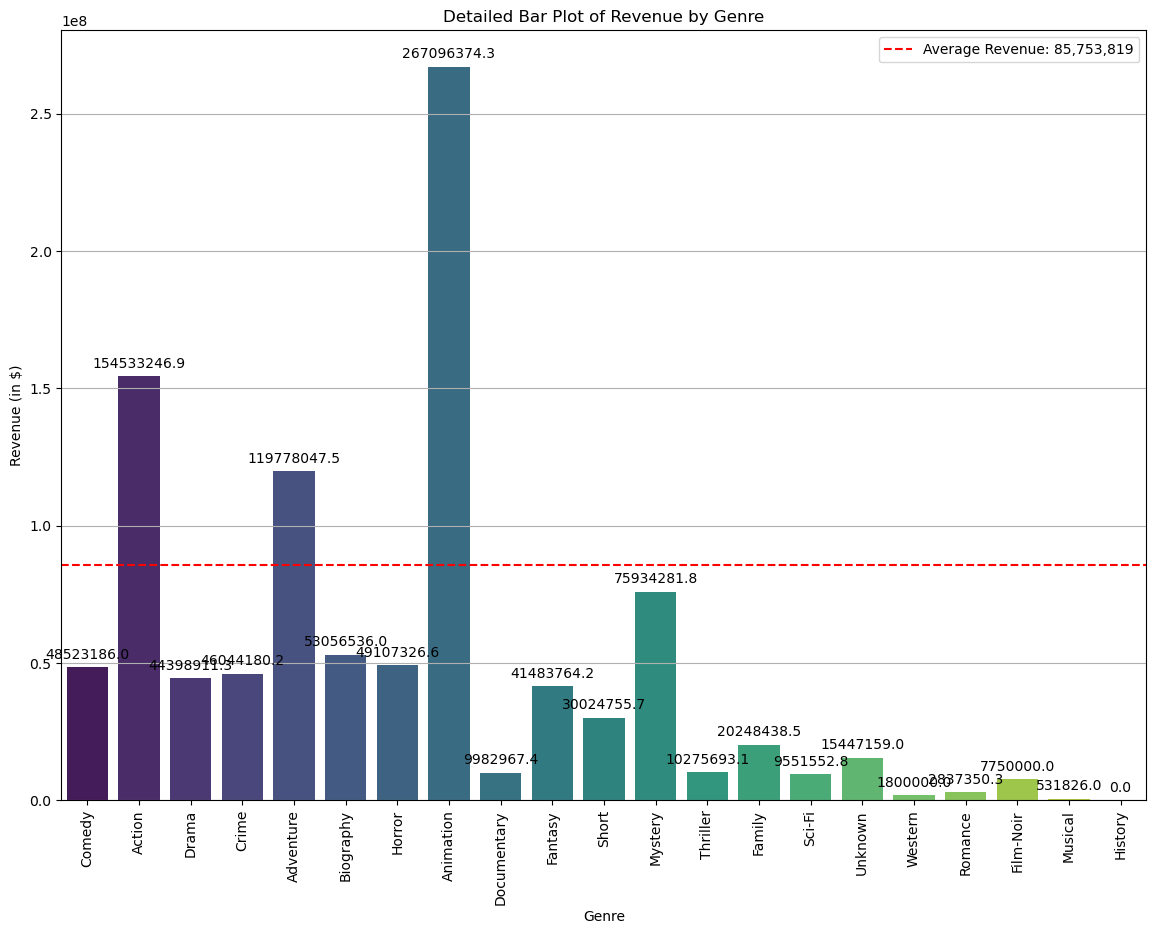

In [38]:
# Sort the data by Revenue for better readability
merged_df_sorted = merged_df.sort_values(by='Revenue', ascending=False)

# Visualization - 11: Detailed Bar Plot of Revenue by Genre
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(
    data=merged_df_sorted, 
    x='Genre', 
    y='Revenue', 
    ci=None, 
    palette='viridis', # Use a color palette based on average popularity
    order=merged_df_sorted['Genre'].value_counts().index # Sort by revenue
)

# Add data labels to show the exact revenue values on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# Add a horizontal line to indicate the average revenue across all genres
avg_revenue = merged_df['Revenue'].mean()
plt.axhline(avg_revenue, color='red', linestyle='--', label=f'Average Revenue: {avg_revenue:,.0f}')

# Add plot title and labels
plt.title('Detailed Bar Plot of Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue (in $)')
plt.xticks(rotation=90)
plt.legend(loc='upper right') # Place legend in the upper right corner
plt.grid(True, axis='y') # Add grid lines for the y-axis
plt.show()

#### **Visualization: Detailed Bar Plot of Revenue by Genre**

The bar plot below illustrates the total revenue generated by movies in each genre. This detailed visualization includes additional elements such as data labels showing exact revenue values for each genre and a horizontal line indicating the average revenue across all genres.

#### **Key Observations**

- **Top Earning Genres:** The plot shows that the Animation genre generates the highest revenue, with an average of 267,096,374.3. This is followed by the Adventure and Comedy genres, which also show substantial revenue figures.
- **Above Average Revenue:** Genres like Comedy, Action, Adventure, Animation, and Mystery have revenues above the average line (indicated by the red dashed line), highlighting their financial success in the movie industry.
- **Lesser Earning Genres:** Genres such as History, Musical, Film-Noir, and Romance show lower revenues, indicating either a niche audience or less investment and production in these genres compared to others.
- **Average Revenue Line:** The red dashed line represents the average revenue across all genres, which is approximately $85,753,819. This line helps quickly identify which genres perform above or below the average.

This detailed bar plot provides a comprehensive view of the revenue distribution across different genres, highlighting the most and least financially successful genres. The addition of data labels and the average revenue line enhances the interpretability of the visualization, making it easier to compare the financial performance of various movie genres.


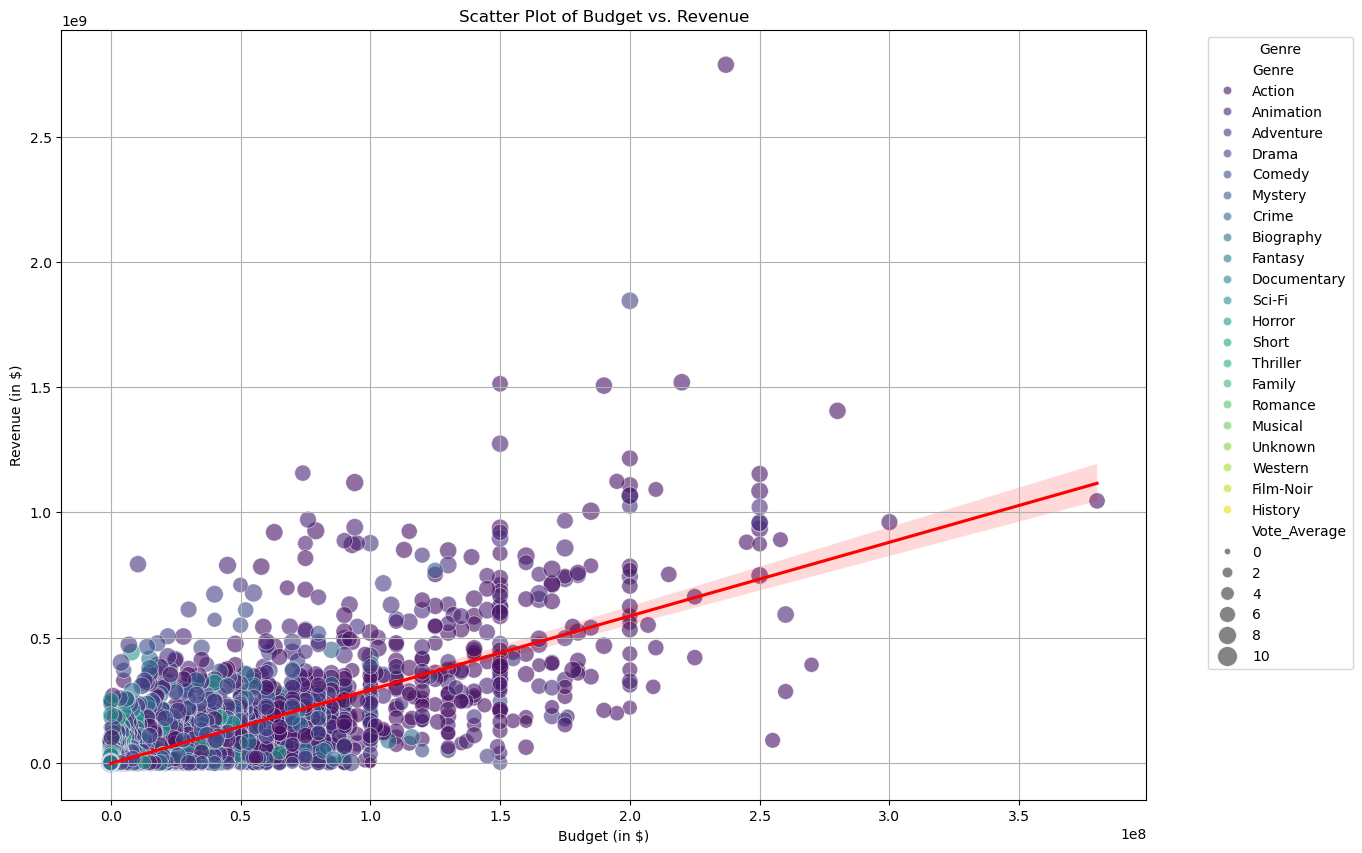

In [41]:
# Visualization - 12: Detailed Scatter Plot of Budget vs. Revenue
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=merged_df, 
    x='Budget', 
    y='Revenue', 
    hue='Genre', # Color points by Genre
    size='Vote_Average', # Adjust size based on Vote Average
    sizes=(20, 200), # Set the size range
    palette='viridis', # Use a color palette
    alpha=0.6, # Set the transparency level
    edgecolor='w', # Set edge color for better visibility
    linewidth=0.5 # Set edge width
)

# Add a regression line to show the trend
sns.regplot(
    data=merged_df, 
    x='Budget', 
    y='Revenue', 
    scatter=False, 
    color='red', 
    line_kws={'label': 'Trend Line'}
)

# Add plot title and labels
plt.title('Scatter Plot of Budget vs. Revenue')
plt.xlabel('Budget (in $)')
plt.ylabel('Revenue (in $)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
plt.grid(True) # Add grid for better readability
plt.show()

#### **Visualization: Detailed Scatter Plot of Budget vs. Revenue**

The scatter plot below illustrates the relationship between movie budgets and revenues. This detailed visualization includes a regression line with a confidence interval to highlight the trend and correlation between these two financial metrics.

#### **Key Observations**

- **Positive Correlation:** The scatter plot shows a positive correlation between budget and revenue, indicating that higher-budget movies tend to generate higher revenues. This trend is reinforced by the regression line.
- **Diverse Genres:** The color-coded dots represent different genres, visually comparing how various genres perform financially. While high-budget movies in genres like Action, Adventure, and Animation often lead to high revenues, there are also successful lower-budget films in genres like Comedy and Horror.
- **Outliers:** A few outliers exist where movies with exceptionally high budgets did not achieve correspondingly high revenues, and vice versa. These outliers suggest that while budget is an important factor, other elements such as marketing, release timing, and audience reception also play crucial roles in a movie's financial success.

This detailed scatter plot provides a comprehensive view of the financial dynamics in the movie industry, highlighting the general trend that higher investments in movie production often lead to higher financial returns. The inclusion of genre differentiation adds depth to the analysis, showcasing how different genres fare in terms of budget and revenue.


## **Final Concluding Analysis**

This project aimed to analyze and uncover factors contributing to movies' commercial success and audience reception by integrating and examining data from The Movie Database (TMDB), The Open Movie Database (OMDb) API, and IMDb. We have derived several key insights into the movie industry's dynamics and financial performance through data cleaning, merging, and visualization.

### **Key Findings**

1. **Budget vs. Revenue:** There is a clear positive correlation between budget and revenue, indicating that higher-budget movies tend to generate higher revenues. This trend was evident across various genres, with Animation, Adventure, and Action movies showing the highest financial returns.

2. **Genre Popularity and Financial Success:** Animation emerged as the top-earning genre, followed by Adventure and Comedy. These genres consistently performed above average in terms of revenue, highlighting their broad appeal and financial viability.

3. **Distribution of Vote Averages:** The distribution of vote averages was relatively normal, with a slight skew towards higher ratings. Most movies received moderate to high ratings, suggesting general audience satisfaction.

4. **Movie Status:** The dataset primarily comprised released movies, with very few in post-production or rumored status. This reflects the focus on completed projects within the available data.

5. **Annual and Decadal Trends:** There was a noticeable peak in movie production in the 2000s and 2010s, followed by a decline in recent years. This trend underscores periods of high activity and the impact of external factors such as market saturation and global events on the film industry.

6. **Production Companies:** Paramount Pictures, Universal Pictures, and Columbia Pictures were identified as the most prolific production companies, indicating their significant influence and output in the industry.

### **Key Takeaways: Data Preparation from Different Sources**

1. **Data Integration:** Successfully combining data from flat files, APIs, and the web requires careful planning and execution. Ensuring consistency across different datasets is crucial for accurate analysis.

2. **Handling Missing Values:** Managing missing data is a critical step in preparing datasets for analysis. Techniques such as imputation or exclusion must be applied based on the context and availability of data.

3. **Standardization:** Standardizing data formats, such as date formats and numerical values, ensures uniformity and reduces the risk of errors during the merging process.

4. **Data Cleaning:** Identifying and correcting discrepancies, such as duplicate entries or inconsistent naming conventions, is essential for creating a reliable and cohesive dataset.

5. **Merging Strategies:** Choosing appropriate keys for merging datasets, such as movie titles or unique identifiers, is vital. Ensuring these keys are clean and standardized across datasets facilitates successful integration.

6. **Ethical Considerations:** Throughout the data preparation process, ethical considerations such as data privacy, bias, and representation must be taken into account to ensure responsible and fair analysis.

### **Conclusion**

This project has demonstrated the importance of meticulous data preparation when integrating multiple data sources. By effectively cleaning, standardizing, and merging data from flat files, APIs, and web scraping, we gained valuable insights into the movie industry's financial and audience dynamics. The approach and techniques used in this project can be applied to other domains, highlighting the value of comprehensive data integration for robust analysis and informed decision-making.


#### <center>  $\color{indigo}{\text{Appendix }}$ </center>

**Human readable dataset after all transformations should be printed at the end of your notebook.**

In [42]:
merged_df.head()

,Unnamed: 0,Budget,Genres,Homepage,ID,Keywords,Original_Language,Title,Overview,Popularity,...,tconst,titletype,Title.3,originaltitle,isadult,startyear,endyear,runtimeminutes,genres,Decade
0,0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,tt0154182,movie,avatar,avatar,unknown,1941,\n,\n,drama,2000
1,65,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,NaN,en,pirates of the caribbean: at world's end,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,tt0449088,movie,pirates of the caribbean: at world's end,pirates of the caribbean: at world's end,unknown,2007,\n,169,"action,adventure,fantasy",2000
2,72,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,tt0076745,tvmovie,spectre,spectre,unknown,1977,\n,98,horror,2010
3,106,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,the dark knight rises,Following the death of District Attorney Harve...,112.312950,...,tt12126330,tvepisode,the dark knight rises,the dark knight rises,unknown,2019,\n,\n,talk-show,2010
4,129,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,john carter,"John Carter is a war-weary, former military ca...",43.926995,...,tt0401729,movie,john carter,john carter,unknown,2012,\n,132,"action,adventure,sci-fi",2010


In [43]:
merged_df.tail()

,Unnamed: 0,Budget,Genres,Homepage,ID,Keywords,Original_Language,Title,Overview,Popularity,...,tconst,titletype,Title.3,originaltitle,isadult,startyear,endyear,runtimeminutes,genres,Decade
4402,74777,220000,"Action, Crime, Thriller",NaN,9367,"united states–mexico barrier, legs, arms, pape...",es,el mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,tt0104815,movie,el mariachi,el mariachi,unknown,1992,\n,81,"action,crime,thriller",1990
4403,74782,9000,"Comedy, Romance",NaN,72766,NaN,en,newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,tt0106082,tvseries,newlyweds,newlyweds,unknown,1993,1994,25,comedy,2010
4404,74799,0,"Comedy, Drama, Romance, TV Movie",http://www.hallmarkchannel.com/signedsealeddel...,231617,"date, love at first sight, narration, investig...",en,"signed, sealed, delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,tt0653873,tvepisode,"signed, sealed, delivered","signed, sealed, delivered",unknown,1988,\n,30,comedy,2010
4405,74812,0,NaN,http://shanghaicalling.com/,126186,NaN,en,shanghai calling,When ambitious New York attorney Sam is sent t...,0.857008,...,tt2070597,movie,shanghai calling,shanghai calling,unknown,2012,\n,100,"comedy,drama,romance",2010
4406,74813,0,Documentary,NaN,25975,"obsession, camcorder, crush, dream girl",en,my date with drew,Ever since the second grade when he first saw ...,1.929883,...,tt0378407,movie,my date with drew,my date with drew,unknown,2004,\n,90,documentary,2000


## References

1. **TMDB Movie Metadata**  
   Description: The provided flat files `tmdb_5000_credits.csv` and `tmdb_5000_movies.csv` contain detailed information on movie credits and various movie attributes from The Movie Database (TMDB). These files include data on cast, crew, budgets, revenues, genres, and more for thousands of movies.  
   Link: [TMDB Movie Metadata](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)

2. **OMDb API**  
   Description: The OMDb API (The Open Movie Database) is a RESTful web service for obtaining movie information. It offers detailed data, including titles, year, ratings, plot descriptions, and poster images for movies and TV series. In this project, movie titles extracted from the `tmdb_5000_credits.csv` file were used as search queries for the OMDb API to expand the dataset.  
   Link: [OMDb API](https://www.omdbapi.com/)

3. **IMDb**  
   Description: IMDb (Internet Movie Database) offers a comprehensive database and ratings for movies, TV shows, and celebrities. It's a crucial source for movie ratings, reviews, and detailed cast and crew information.  
   Link: [IMDb](https://datasets.imdbws.com/)
